In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD

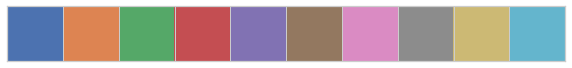

In [2]:
#set colors
sns.set(style="whitegrid", palette="deep")
sns.palplot(sns.color_palette())

In [95]:
def get_idx(data, i):
    return data.applymap(lambda x: x[i] if pd.notnull(x) else np.nan)

In [96]:
recipe_Rhat_com = pd.read_pickle("results/recipe_Rhat_com.pkl")
recipe_Rhat_int = pd.read_pickle("results/recipe_Rhat_int.pkl")
recipe_R_com = pd.read_pickle("results/recipe_R_com.pkl")
recipe_R_int = pd.read_pickle("results/recipe_R_int.pkl")
user_Uhat_com = pd.read_pickle("results/user_Uhat_com.pkl")
user_Uhat_int = pd.read_pickle("results/user_Uhat_int.pkl")
user_U_com = pd.read_pickle("results/user_U_com.pkl")
user_U_int = pd.read_pickle("results/user_U_int.pkl")

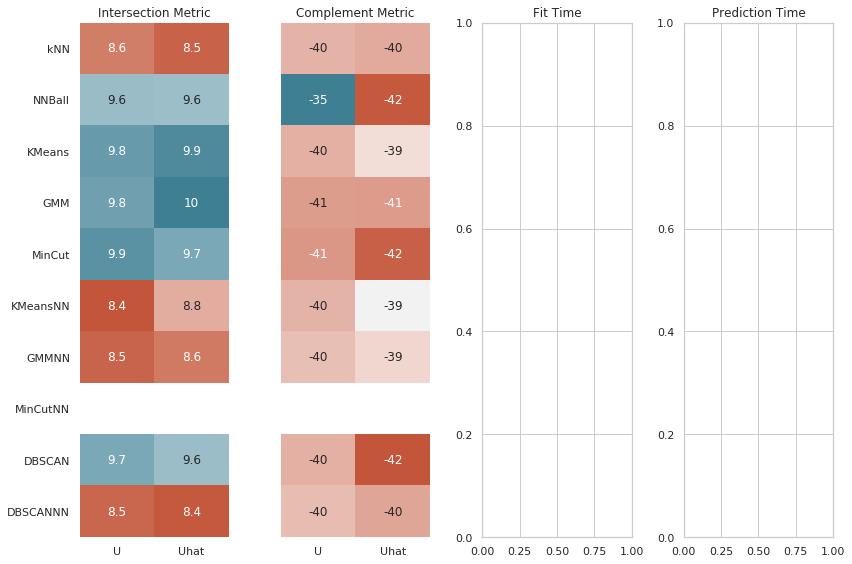

In [133]:
fig, ax = plt.subplots(1, 4, figsize=(12,8))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Uint = get_idx(user_U_int, 0).max().rename('U')
Uhatint = get_idx(user_Uhat_int, 0).max().rename('Uhat')
ints = pd.concat([Uint, Uhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False)
ax[0].set_title("Intersection Metric")

#Complement
Ucom = get_idx(user_U_com, 0).max().rename('U')
Uhatcom = get_idx(user_Uhat_com, 0).max().rename('Uhat')
coms = pd.concat([Ucom, Uhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False)
ax[1].set_title("Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
# Ucom = get_idx(user_U_com, 1).min().rename('U')
# Uhatcom = get_idx(user_Uhat_com, 1).min().rename('Uhat')

# ints = get_idx(user_U_int, 1).max().rename('U')
# Uhatint = get_idx(user_Uhat_int, 1).max().rename('Uhat')

# coms = pd.concat([Ucom, Uhatcom], axis=1)
# sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False)
ax[2].set_title("Fit Time")
# ax[1].get_yaxis().set_ticks([])

#Time to predict
ax[3].set_title("Prediction Time")


plt.tight_layout()
plt.show()

In [114]:
Ucom = get_idx(user_U_com, 1).min().rename('U')
Uhatcom = get_idx(user_Uhat_com, 1).min().rename('Uhat')

ints = get_idx(user_U_int, 0).max().rename('U')
Uhatint = get_idx(user_Uhat_int, 0).max().rename('Uhat')

In [125]:
get_idx(user_U_com, 1).idxmax()

kNN         LDA
NNBall      LDA
KMeans      LDA
GMM         LDA
MinCut      LDA
KMeansNN    LDA
GMMNN       LDA
MinCutNN    NaN
DBSCAN      LDA
DBSCANNN    NMF
dtype: object